In [ ]:
import pandas as pd

file_path = '/content/SnA Consulting - Excel Case 2.xlsx'
xls = pd.ExcelFile(file_path)

xls.sheet_names

['Veri', 'Görevler']

In [ ]:
data = pd.read_excel(xls, sheet_name='Veri')

data.head()

,Customer ID,Month,Subscription Type,Data Used (GB),Minutes Used,Bill Amount (TL),City,Customer Satisfaction
0,45,January 2023,Prepaid,22.69,1527.74,37.15,Antalya,5
1,48,March 2023,Prepaid,46.64,625.02,407.83,Ankara,3
2,65,May 2023,Postpaid,38.18,312.20,380.48,Ankara,7
3,68,April 2023,Prepaid,15.64,1302.93,411.68,Ankara,3
4,68,June 2023,Prepaid,44.44,674.16,360.27,Ankara,3


In [ ]:
# calculate the average bill amount and customer satisfaction
average_bill = data['Bill Amount (TL)'].mean()
average_satisfaction = data['Customer Satisfaction'].mean()

# check the correlation between bill amount and customer satisfaction
correlation = data['Bill Amount (TL)'].corr(data['Customer Satisfaction'])

# Summary of the results
average_bill, average_satisfaction, correlation


(262.44072, 5.568, 0.017133080466482226)

- Ortalama fatura tutarı: 262.44 TL
- Ortalama müşteri memnuniyeti: 5.57 (1-10 arası bir ölçek)
- Fatura tutarı ile müşteri memnuniyeti arasındaki korelasyon: 0.017

Bu oldukça düşük bir korelasyon değeri, yani ortalama fatura tutarı ile müşteri memnuniyeti arasında neredeyse hiç ilişki bulunmuyor. Bu durum, fatura tutarının müşteri memnuniyetini doğrudan etkilemediğini gösterebilir.

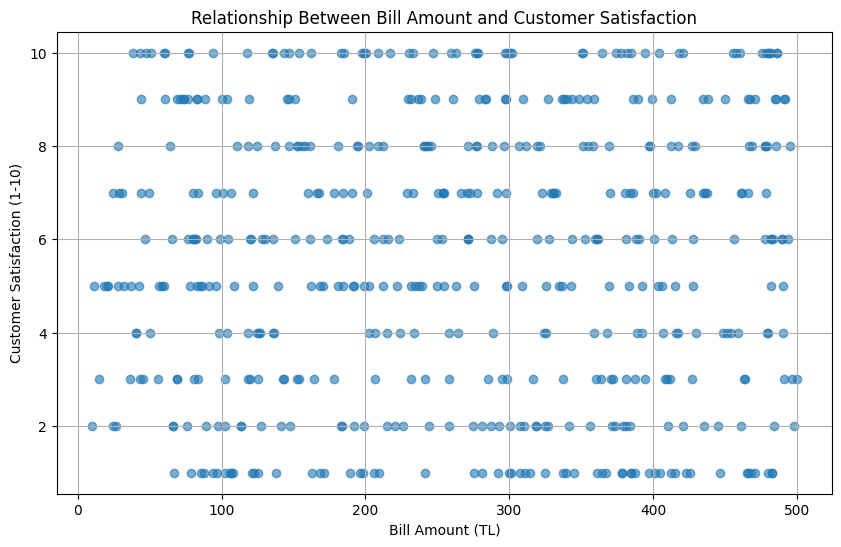

In [ ]:
import matplotlib.pyplot as plt

# scatter plot to visualize the relationship between Bill Amount and Customer Satisfaction
plt.figure(figsize=(10, 6))
plt.scatter(data['Bill Amount (TL)'], data['Customer Satisfaction'], alpha=0.6)
plt.title('Relationship Between Bill Amount and Customer Satisfaction')
plt.xlabel('Bill Amount (TL)')
plt.ylabel('Customer Satisfaction (1-10)')
plt.grid(True)

# Show the plot
plt.show()


Yukarıdaki bu grafik, fatura tutarı ile müşteri memnuniyeti arasındaki doğrudan ilişkiyi gösteriyor. Noktaların dağınıklığı, bu iki değişken arasında belirgin bir korelasyon olmadığını gösteriyor. Korelasyon değeri de çok düşük (0.017), yani fatura tutarı arttıkça müşteri memnuniyeti doğrudan etkilenmiyor.

Fatura tutarı ile müşteri memnuniyeti arasında güçlü bir ilişki bulunmuyor. Fatura tutarının artışı, müşteri memnuniyetini olumlu veya olumsuz yönde anlamlı bir şekilde etkilemiyor.

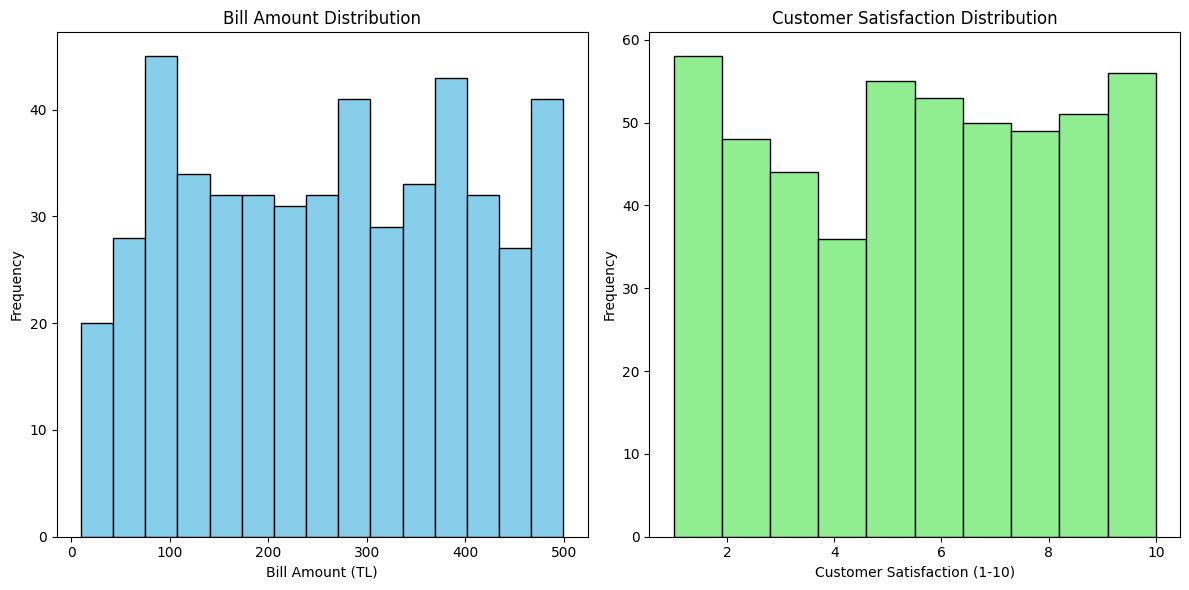

In [ ]:
# histograms for Bill Amount and Customer Satisfaction
plt.figure(figsize=(12, 6))

# Histogram for Bill Amount
plt.subplot(1, 2, 1)
plt.hist(data['Bill Amount (TL)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Bill Amount Distribution')
plt.xlabel('Bill Amount (TL)')
plt.ylabel('Frequency')

# Histogram for Customer Satisfaction
plt.subplot(1, 2, 2)
plt.hist(data['Customer Satisfaction'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Customer Satisfaction (1-10)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


Fatura tutarı dağılımı geniş bir aralığa yayılmışken, müşteri memnuniyeti daha çok ortalama değerler etrafında toplanmış. Fatura tutarları düşükten yükseğe geniş bir spektrumda dağılırken, müşteri memnuniyeti genellikle orta seviyelerde yoğunlaşıyor. Bu da fatura tutarlarının memnuniyeti belirgin şekilde etkilemediği anlamına geliyor.


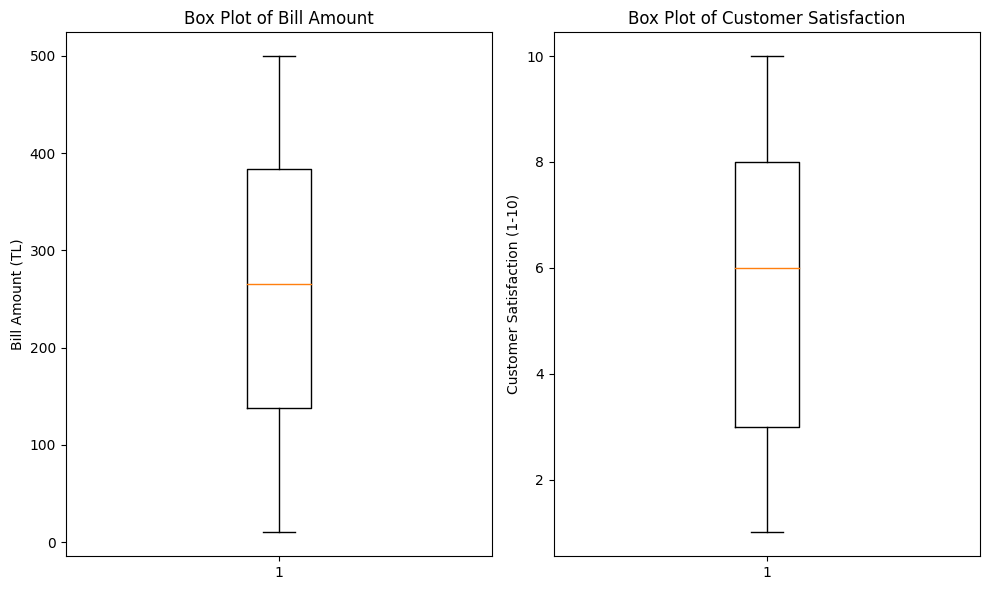

In [ ]:
#  box plots for Bill Amount and Customer Satisfaction
plt.figure(figsize=(10, 6))

# Box plot for Bill Amount and Customer Satisfaction
plt.subplot(1, 2, 1)
plt.boxplot(data['Bill Amount (TL)'])
plt.title('Box Plot of Bill Amount')
plt.ylabel('Bill Amount (TL)')

plt.subplot(1, 2, 2)
plt.boxplot(data['Customer Satisfaction'])
plt.title('Box Plot of Customer Satisfaction')
plt.ylabel('Customer Satisfaction (1-10)')

# Show the plot
plt.tight_layout()
plt.show()


Box plotlar, fatura tutarlarının ve müşteri memnuniyetinin medyan ve uç değerlerini gösteriyor. Fatura tutarlarının üst kısmında uç değerler görülürken, müşteri memnuniyeti daha dar bir aralıkta, istikrarlı bir şekilde dağılım gösteriyor.

Fatura tutarında uç değerler mevcutken, müşteri memnuniyeti genelde 5-7 arasında sabitlenmiş. Bu, fatura tutarındaki artışların memnuniyeti uç değerlerde bile çok fazla değiştirmediğini ortaya koyuyor.

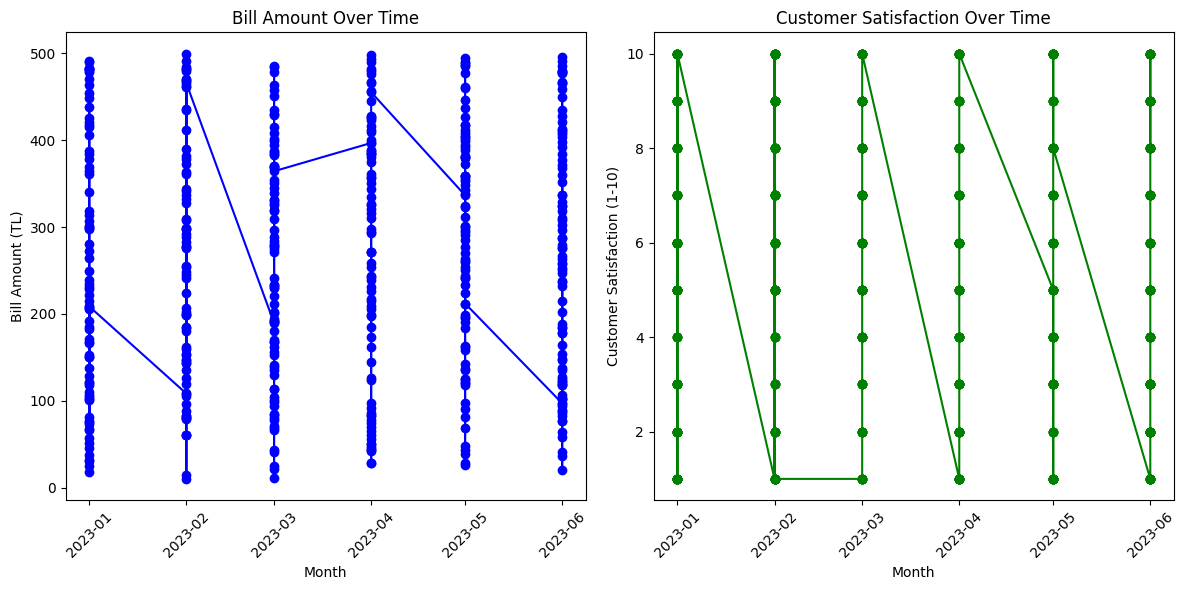

In [ ]:
# Convert the 'Month' column to a datetime format for better time series plotting
data['Month'] = pd.to_datetime(data['Month'], format='%B %Y')

# Sort the data by Month for a clear time series plot
data_sorted = data.sort_values('Month')

# Create line charts for Bill Amount and Customer Satisfaction over time
plt.figure(figsize=(12, 6))

# Line plot for Bill Amount over time
plt.subplot(1, 2, 1)
plt.plot(data_sorted['Month'], data_sorted['Bill Amount (TL)'], color='blue', marker='o')
plt.title('Bill Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Bill Amount (TL)')
plt.xticks(rotation=45)

# Line plot for Customer Satisfaction over time
plt.subplot(1, 2, 2)
plt.plot(data_sorted['Month'], data_sorted['Customer Satisfaction'], color='green', marker='o')
plt.title('Customer Satisfaction Over Time')
plt.xlabel('Month')
plt.ylabel('Customer Satisfaction (1-10)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Zaman serisi grafiğinde, hem fatura tutarları hem de müşteri memnuniyetinin dönemler boyunca dalgalandığını görüyoruz. Ancak, bu iki değişken arasında zaman içinde bir paralellik ya da ilişki gözlemlenmiyor.

Cevap: Zaman içerisinde fatura tutarı değişirken, müşteri memnuniyeti bu değişimlerden etkilenmemiş gibi görünüyor. Zaman serisinde de fatura tutarları ile müşteri memnuniyeti arasında güçlü bir ilişki bulunmuyor.

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Veri setini yükle (kendi dosya yolunu belirtmelisin)
file_path = '/content/SnA Consulting - Excel Case 2.xlsx'
xls = pd.ExcelFile(file_path)

# "Veri" sayfasını yükle
data = pd.read_excel(xls, sheet_name='Veri')

# Ortalama fatura tutarı ve müşteri memnuniyetini hesapla
average_bill = data['Bill Amount (TL)'].mean()
average_satisfaction = data['Customer Satisfaction'].mean()

# Fatura tutarı ile müşteri memnuniyeti arasındaki korelasyonu hesapla
correlation = data['Bill Amount (TL)'].corr(data['Customer Satisfaction'])

# Özet verileri oluştur
summary_data = {
    'Metric': ['Average Bill Amount (TL)', 'Average Customer Satisfaction', 'Correlation (Bill Amount & Satisfaction)'],
    'Value': [average_bill, average_satisfaction, correlation]
}

summary_df = pd.DataFrame(summary_data)

# Excel dosyasına kaydetme işlemi
output_file_path = 'Customer_Satisfaction_Bill_Amount_Analysis.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    summary_df.to_excel(writer, sheet_name='Summary', index=False)
    data.to_excel(writer, sheet_name='Veri', index=False)

print(f"Excel dosyası başarıyla oluşturuldu: {output_file_path}")


Excel dosyası başarıyla oluşturuldu: Customer_Satisfaction_Bill_Amount_Analysis.xlsx


Bu yukardaki kod, önce "Veri" sayfasındaki veriyi yükleyip, ortalama fatura tutarını, müşteri memnuniyetini ve korelasyonu hesaplıyor. Ardından, hem verileri hem de özet istatistikleri bir Excel dosyasına yazıyor.

# **Görev 1: Şehirlere göre toplam fatura tutarını ve ortalama müşteri memnuniyetini gösteren bir pivot tablo oluşturmak.**

In [ ]:
tasks = pd.read_excel(xls, sheet_name='Görevler')

tasks.head(14)


,Görevler:
0,NaN
1,1. Pivot Tablo Oluşturma:
2,Şehirlere göre toplam fatura tutarını ve ortal...
3,NaN
4,2. Görselleştirme:
5,Abonelik tipi ve kullanılan data/dakika dağılı...
6,NaN
7,3. Analiz ve Çıkarımlar:
8,Prepaid ve postpaid abonelik tipleri arasında ...
9,NaN


In [ ]:
#  a pivot table to show the total bill amount and average customer satisfaction by city
pivot_table = data.pivot_table(values=['Bill Amount (TL)', 'Customer Satisfaction'],
                               index='City',
                               aggfunc={'Bill Amount (TL)': 'sum', 'Customer Satisfaction': 'mean'})


pivot_table


,Bill Amount (TL),Customer Satisfaction
City,,
Ankara,27023.77,5.722222
Antalya,24247.38,5.474227
Bursa,25688.61,5.408602
Istanbul,29799.38,5.535714
Izmir,24461.22,5.688889


Şehir bazında toplam fatura tutarları ve ortalama müşteri memnuniyeti şu şekilde:

- Ankara: Toplam fatura tutarı 27,023.77 TL, ortalama memnuniyet 5.72
- Antalya: Toplam fatura tutarı 24,247.38 TL, ortalama memnuniyet 5.47
- Bursa: Toplam fatura tutarı 25,688.61 TL, ortalama memnuniyet 5.41
- Istanbul: Toplam fatura tutarı 29,799.38 TL, ortalama memnuniyet 5.54
- Izmir: Toplam fatura tutarı 24,461.22 TL, ortalama memnuniyet 5.69

In [ ]:
# Save the pivot table to the Excel file, adding it as a new sheet
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    summary_df.to_excel(writer, sheet_name='Summary', index=False)
    data.to_excel(writer, sheet_name='Veri', index=False)
    pivot_table.to_excel(writer, sheet_name='Pivot Table')


output_file_path


'Customer_Satisfaction_Bill_Amount_Analysis.xlsx'

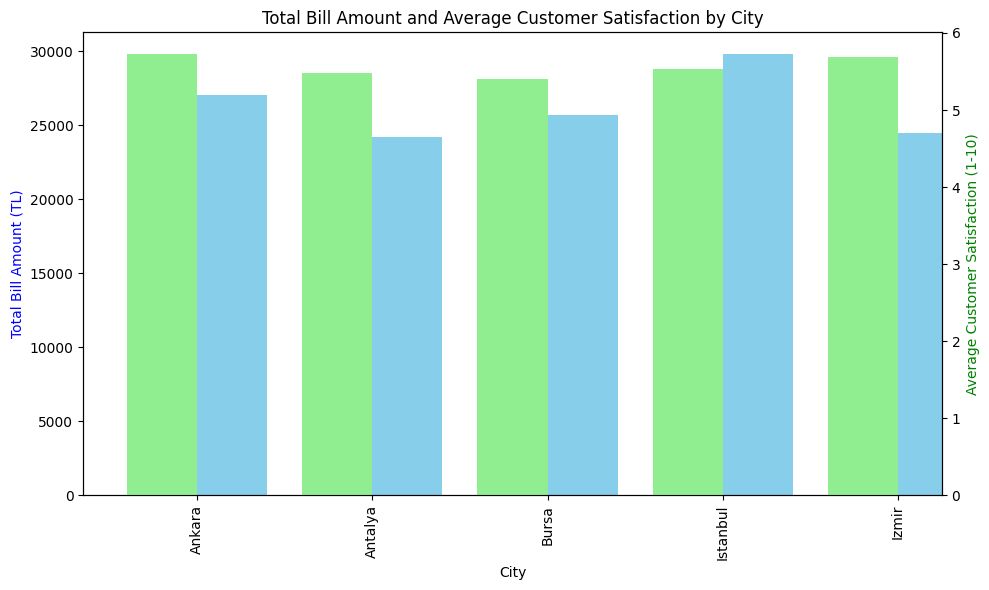

In [ ]:
# a bar chart to visualize the total bill amount and average customer satisfaction by city
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar chart for total bill amount
pivot_table['Bill Amount (TL)'].plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_ylabel('Total Bill Amount (TL)', color='blue')
ax1.set_title('Total Bill Amount and Average Customer Satisfaction by City')

# Create second y-axis for average customer satisfaction
ax2 = ax1.twinx()
pivot_table['Customer Satisfaction'].plot(kind='bar', ax=ax2, color='lightgreen', position=1, width=0.4)
ax2.set_ylabel('Average Customer Satisfaction (1-10)', color='green')

# Show the plot
plt.tight_layout()
plt.show()


Bu yukardaki grafikte, şehir bazında toplam fatura tutarı ve ortalama müşteri memnuniyetini görebilirsiniz. Mavi çubuklar toplam fatura tutarını, yeşil çubuklar ise ortalama müşteri memnuniyetini temsil ediyor.

- Ankara ve Istanbul, en yüksek toplam fatura tutarına sahip şehirler arasında. Bu şehirlerde yüksek kullanıcı sayıları ya da daha yüksek fatura tutarları olabilir.
- Ankara ve Izmir ortalama müşteri memnuniyeti açısından en yüksek değerlere sahipken, Antalya ve Bursa nispeten daha düşük müşteri memnuniyeti gösteriyor.
- Istanbul'un toplam fatura tutarı en yüksek olmasına rağmen, müşteri memnuniyeti diğer şehirlere kıyasla orta seviyede kalmış.
- Antalya ve Bursa, toplam fatura tutarı açısından birbirine yakın olmasına rağmen, müşteri memnuniyeti açısından Antalya, Bursa'nın biraz üzerinde.

Bu grafik de gösteriyor ki, şehir bazında toplam fatura tutarları ile müşteri memnuniyeti arasında doğrudan bir ilişki yok. Örneğin, Istanbul en yüksek fatura tutarına sahip olmasına rağmen memnuniyet ortalamada kalıyor. Ankara ise yüksek bir fatura tutarına sahip olmasının yanı sıra, müşteri memnuniyeti de yüksek olan bir şehir.

# **Görev 2: Abonelik tipi (prepaid ve postpaid) ile kullanılan veri (GB) ve dakika dağılımlarının görselleştirilmesi**

In [ ]:
tasks.iloc[4:10]


,Görevler:
4,2. Görselleştirme:
5,Abonelik tipi ve kullanılan data/dakika dağılı...
6,NaN
7,3. Analiz ve Çıkarımlar:
8,Prepaid ve postpaid abonelik tipleri arasında ...
9,NaN


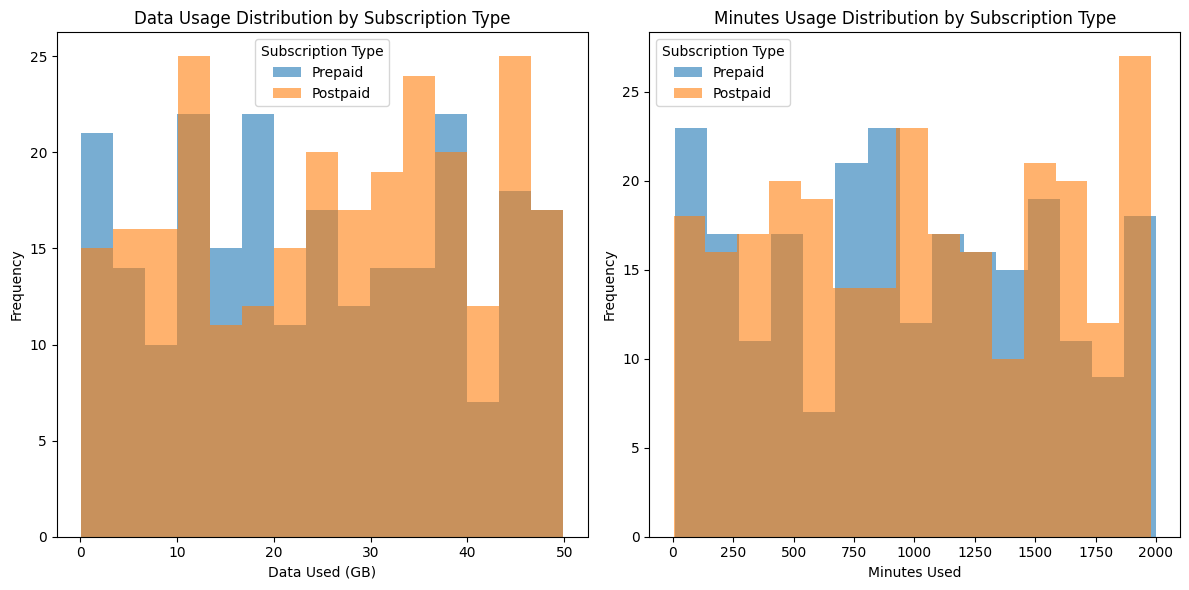

In [ ]:
#  histograms to visualize the data usage (GB) and minutes usage distribution by Subscription Type
plt.figure(figsize=(12, 6))

# Histogram for Data Used (GB) by Subscription Type
plt.subplot(1, 2, 1)
for subscription_type in data['Subscription Type'].unique():
    subset = data[data['Subscription Type'] == subscription_type]
    plt.hist(subset['Data Used (GB)'], bins=15, alpha=0.6, label=subscription_type)

plt.title('Data Usage Distribution by Subscription Type')
plt.xlabel('Data Used (GB)')
plt.ylabel('Frequency')
plt.legend(title='Subscription Type')

# Histogram for Minutes Used by Subscription Type
plt.subplot(1, 2, 2)
for subscription_type in data['Subscription Type'].unique():
    subset = data[data['Subscription Type'] == subscription_type]
    plt.hist(subset['Minutes Used'], bins=15, alpha=0.6, label=subscription_type)

plt.title('Minutes Usage Distribution by Subscription Type')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.legend(title='Subscription Type')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Abonelik tipi analizini oluştur
analysis_data = {
    'Subscription Type': ['Prepaid', 'Postpaid'],
    'Average Data Used (GB)': [
        data[data['Subscription Type'] == 'Prepaid']['Data Used (GB)'].mean(),
        data[data['Subscription Type'] == 'Postpaid']['Data Used (GB)'].mean()
    ],
    'Average Minutes Used': [
        data[data['Subscription Type'] == 'Prepaid']['Minutes Used'].mean(),
        data[data['Subscription Type'] == 'Postpaid']['Minutes Used'].mean()
    ]
}

analysis_df = pd.DataFrame(analysis_data)

# Excel dosyasına kaydetme
output_file_path = 'Customer_Satisfaction_Bill_Amount_Analysis.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    summary_df.to_excel(writer, sheet_name='Summary', index=False)
    data.to_excel(writer, sheet_name='Veri', index=False)
    pivot_table.to_excel(writer, sheet_name='Pivot Table')
    analysis_df.to_excel(writer, sheet_name='Subscription Analysis', index=False)

print(f"Excel dosyası başarıyla oluşturuldu: {output_file_path}")


Excel dosyası başarıyla oluşturuldu: Customer_Satisfaction_Bill_Amount_Analysis.xlsx


# **Görev 3: prepaid ve postpaid abonelik tipleri arasındaki farkları analiz etmek**

In [ ]:
tasks.iloc[7:10]


,Görevler:
7,3. Analiz ve Çıkarımlar:
8,Prepaid ve postpaid abonelik tipleri arasında ...
9,NaN


In [ ]:
# Prepaid ve Postpaid abonelik tiplerini karşılaştır
subscription_comparison = data.groupby('Subscription Type').agg({
    'Customer Satisfaction': 'mean',
    'Bill Amount (TL)': 'mean',
    'Data Used (GB)': 'mean',
    'Minutes Used': 'mean'
}).reset_index()


print(subscription_comparison)


  Subscription Type  Customer Satisfaction  Bill Amount (TL)  Data Used (GB)  \
0          Postpaid               5.439394        262.829280       26.127955   
1           Prepaid               5.711864        262.006059       24.560466   

   Minutes Used  
0   1012.839167  
1    966.238178  


**Prepaid ve Postpaid Abonelik Tiplerinin Karşılaştırılması:**

Müşteri Memnuniyeti:

- Postpaid: 5.44
- Prepaid: 5.71
- Yorum: Prepaid aboneliklerde müşteri memnuniyeti, postpaid'e göre biraz daha yüksek. Bu, prepaid aboneliklerin kullanıcılarına daha fazla esneklik sağlamasıyla ilgili olabilir.

Fatura Tutarı:

- Postpaid: 262.83 TL
- Prepaid: 262.01 TL
- Yorum: Fatura tutarları prepaid ve postpaid arasında neredeyse aynı. Aradaki fark minimal, bu da iki abonelik türünün maliyet açısından çok farklı olmadığını gösteriyor.

Veri Kullanımı (GB):

- Postpaid: 26.13 GB
- Prepaid: 24.56 GB
- Yorum: Postpaid kullanıcıları, prepaid kullanıcılardan biraz daha fazla veri kullanıyor. Postpaid aboneliklerdeki veri paketlerinin daha büyük olması bu farkı yaratıyor olabilir.

Dakika Kullanımı:

- Postpaid: 1012.84 dakika
- Prepaid: 966.24 dakika
- Yorum: Postpaid kullanıcıları, prepaid kullanıcılardan daha fazla konuşma süresi harcıyor. Bu da yine postpaid aboneliklerdeki paket avantajlarıyla ilişkili olabilir.

Genel Sonuç:

Prepaid aboneliklerde müşteri memnuniyeti daha yüksek olmasına rağmen, postpaid kullanıcıları daha fazla veri ve dakika kullanıyor. Bu bulgular, her iki abonelik türünün farklı kullanıcı ihtiyaçlarına hitap ettiğini ve kullanıcıların tercihlerini etkileyen faktörlerin sadece maliyet değil, aynı zamanda kullanım özellikleri olduğunu gösteriyor.

 Çıkarımlar:
 - Veri ve Dakika Kullanımı: Postpaid kullanıcıları genelde daha fazla veri ve dakika kullanıyor. Postpaid aboneliklerin veri ve dakika paketlerinde sundukları avantajlar, bu kullanıcıların daha yüksek kullanım alışkanlıklarına sahip olmasına neden olabilir.
 - Fatura Tutarı: Fatura tutarları her iki abonelik tipinde de çok benzer. Bu, maliyetin kullanıcı tercihlerinde büyük bir etken olmadığını gösterebilir.

 -Müşteri Memnuniyeti: Prepaid kullanıcılarının memnuniyeti daha yüksek olabilir, çünkü bu abonelik tipi kullanıcılara daha fazla esneklik sağlayabilir.

In [ ]:
# Prepaid ve Postpaid analiz sonuçlarını DataFrame'e ekleyelim
subscription_comparison = data.groupby('Subscription Type').agg({
    'Customer Satisfaction': 'mean',
    'Bill Amount (TL)': 'mean',
    'Data Used (GB)': 'mean',
    'Minutes Used': 'mean'
}).reset_index()

# Yeni Excel dosyasına ekleyelim
output_file_path = 'Customer_Satisfaction_Bill_Amount_Analysis.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    summary_df.to_excel(writer, sheet_name='Summary', index=False)
    data.to_excel(writer, sheet_name='Veri', index=False)
    pivot_table.to_excel(writer, sheet_name='Pivot Table')
    analysis_df.to_excel(writer, sheet_name='Subscription Analysis', index=False)
    subscription_comparison.to_excel(writer, sheet_name='Prepaid vs Postpaid', index=False)

print(f"Excel dosyası başarıyla oluşturuldu: {output_file_path}")


Excel dosyası başarıyla oluşturuldu: Customer_Satisfaction_Bill_Amount_Analysis.xlsx


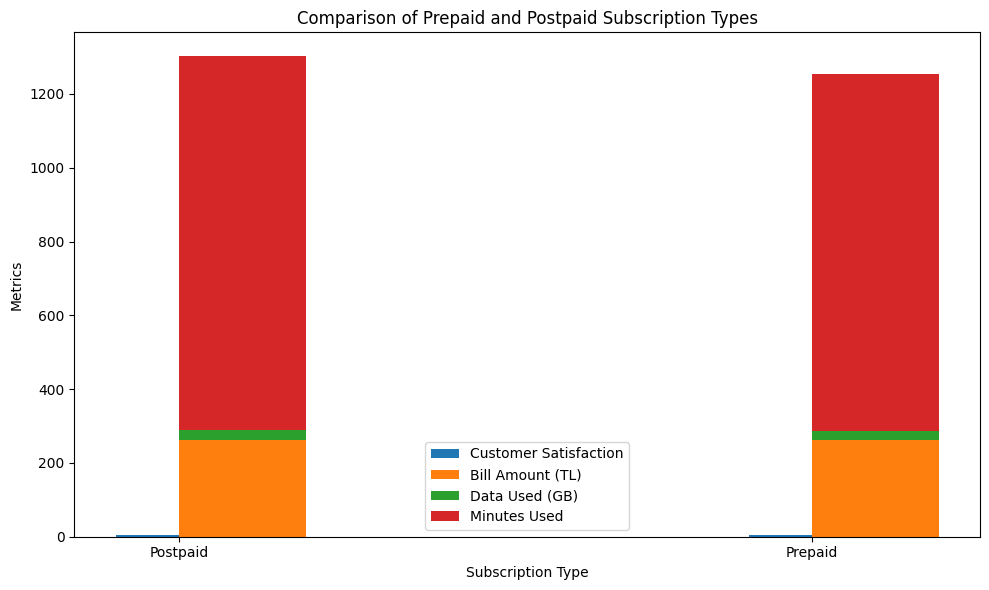

In [ ]:
import matplotlib.pyplot as plt

# Grafiği oluşturalım
fig, ax = plt.subplots(figsize=(10, 6))

# Bar grafiği için verilere ulaşalım
subscription_types = subscription_comparison['Subscription Type']
bar_width = 0.2

# Barları ekleyelim
ax.bar(subscription_types, subscription_comparison['Customer Satisfaction'], width=bar_width, label='Customer Satisfaction', align='center')
ax.bar(subscription_types, subscription_comparison['Bill Amount (TL)'], width=bar_width, label='Bill Amount (TL)', align='edge')
ax.bar(subscription_types, subscription_comparison['Data Used (GB)'], width=bar_width, label='Data Used (GB)', align='edge', bottom=subscription_comparison['Bill Amount (TL)'])
ax.bar(subscription_types, subscription_comparison['Minutes Used'], width=bar_width, label='Minutes Used', align='edge', bottom=subscription_comparison['Bill Amount (TL)'] + subscription_comparison['Data Used (GB)'])

# Grafiği etiketleyelim
ax.set_xlabel('Subscription Type')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Prepaid and Postpaid Subscription Types')
ax.legend()

plt.tight_layout()
plt.show()


# **Görev 4: Kullanılan data miktarı 10 GB'den fazla olan müşterilere 'Yüksek Kullanım', diğerlerine 'Düşük Kullanım' etiketini verin.**

In [ ]:
# 'Kullanım Etiketi' sütununu ekleyelim
data['Kullanım Etiketi'] = data['Data Used (GB)'].apply(lambda x: 'Yüksek Kullanım' if x > 10 else 'Düşük Kullanım')


print(data[['Customer ID', 'Data Used (GB)', 'Kullanım Etiketi']].head(20))


    Customer ID  Data Used (GB) Kullanım Etiketi
0            45           22.69  Yüksek Kullanım
1            48           46.64  Yüksek Kullanım
2            65           38.18  Yüksek Kullanım
3            68           15.64  Yüksek Kullanım
4            68           44.44  Yüksek Kullanım
5            10           34.89  Yüksek Kullanım
6            84           23.22  Yüksek Kullanım
7            22           13.30  Yüksek Kullanım
8            37           28.82  Yüksek Kullanım
9            88            9.83   Düşük Kullanım
10           71           37.09  Yüksek Kullanım
11           89           46.85  Yüksek Kullanım
12           89           33.00  Yüksek Kullanım
13           13           36.28  Yüksek Kullanım
14           59            8.31   Düşük Kullanım
15           66           37.44  Yüksek Kullanım
16           40           24.92  Yüksek Kullanım
17           88            4.46   Düşük Kullanım
18           47           19.38  Yüksek Kullanım
19           89     

In [ ]:
# Yeni 'Kullanım Etiketi' sütununu da içeren veriyi Excel'e ekleyelim
output_file_path = 'Customer_Satisfaction_Bill_Amount_Analysis.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    data.to_excel(writer, sheet_name='Veri', index=False)
    pivot_table.to_excel(writer, sheet_name='Pivot Table')
    analysis_df.to_excel(writer, sheet_name='Subscription Analysis', index=False)
    subscription_comparison.to_excel(writer, sheet_name='Prepaid vs Postpaid', index=False)

print(f"Excel dosyası başarıyla oluşturuldu: {output_file_path}")


Excel dosyası başarıyla oluşturuldu: Customer_Satisfaction_Bill_Amount_Analysis.xlsx
